<a href="https://colab.research.google.com/github/SeanPatrickHurley/MLE_S25/blob/main/HW2_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [ ]:
import numpy as np
from collections import Counter
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#Importing MNIST Data

In [ ]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

(X, y), (_, _) = mnist.load_data()

#print(X.shape)
#print(y.shape)

X = X[y % 2 == 0] #Removes even values based on even numbered tags
y = y[y % 2 == 0] #y edited after we use it for X

#print(X_train.shape)
#print(y_train.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Now we can split the data for training

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(
    X,y,
    test_size=0.30,
    random_state=123,
    shuffle=True,
    stratify=y)

print('X_train shape :', X_train.shape)
print('X_test shape :', X_test.shape)
print('y_train shape :', y_train.shape)
print('y_test shape :', y_test.shape)

#for i in range(10):
 #print (y_test[i])

X_train shape : (20644, 28, 28)
X_test shape : (8848, 28, 28)
y_train shape : (20644,)
y_test shape : (8848,)


# Now, we will train our data using k-Nearest Neighbors

Text(20.72222222222222, 0.5, 'Numbers from Dataset')

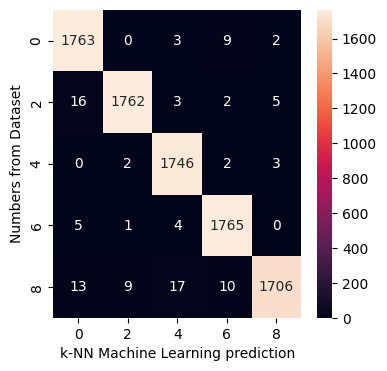

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

#Now we must change the X data from image-feature_matrix data into image-feature_vector data
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

knn = KNeighborsClassifier(n_neighbors=3,p=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

CM = confusion_matrix(y_test, y_pred) #This gets the confusion matrix we want

class_labels = np.unique(y_test) #This gives us the targets wanted, rather than listing the indicies of them

plt.figure(figsize=[4,4])
sns.heatmap(CM,annot=True,fmt='g',
 xticklabels=class_labels,  # Set x-axis labels
 yticklabels=class_labels)  # Set y-axis labels
plt.xlabel('k-NN Machine Learning prediction')
plt.ylabel('Numbers from Dataset')

Finally, we will find the accuracy of the model of predicting the number 6 correctly (true positives)/(true positives + false positives)

In [ ]:
guess_count = 0
for i in range(5): #We can hard code the number of targets here
  guess_count += CM[i,3]
  #print(CM[i,3])
  #print(guess_count)
correct_guesses_for_6 = CM[3,3] #3 is just the index of the image 6 in our confusion map

print("True Positive Accuracy if an image is predicted to b a '6' =",f"{correct_guesses_for_6/guess_count*100}","%")

True Positive Accuracy if an image is predicted to b a '6' = 98.71364653243847 %


# Now, we reprint our graph giving an overall accuracy for correctly identifying a random number

Text(0.5, 1.0, 'Overall k-NN Model Accuracy = 98.8%')

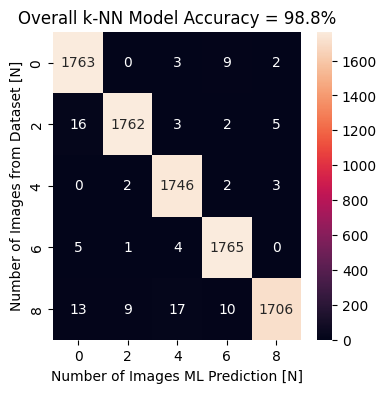

In [ ]:
total_guesses = y_test.size

correct_guesses_overall = 0
for i in range(5):
  correct_guesses_overall += CM[i,i]

TITLE = f"Overall k-NN Model Accuracy = {correct_guesses_overall/total_guesses*100:.3g}%"
#print(TITLE)

plt.figure(figsize=[4,4])
sns.heatmap(CM,annot=True,fmt='g',
 xticklabels=class_labels,  # Set x-axis labels
 yticklabels=class_labels)  # Set y-axis labels
plt.xlabel('Number of Images ML Prediction [N]')
plt.ylabel('Number of Images from Dataset [N]')
plt.title(TITLE)